In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D

In [2]:
batch_size = 32
epoch_size = 15
target_size = (256, 256)
directory = "..\\Datasets\\sachinkumar413\\Splitted_Dataset"

trainDatagen = ImageDataGenerator(rescale= 1/255.)
testDatagen = ImageDataGenerator(rescale= 1/255.)
validationDatagen = ImageDataGenerator(rescale= 1/255.)

train = trainDatagen.flow_from_directory(directory= f"{directory}/train", batch_size= batch_size, class_mode= 'categorical', target_size= target_size, shuffle= True)
test = testDatagen.flow_from_directory(directory= f"{directory}/test", batch_size= batch_size, class_mode= "categorical", target_size= target_size, shuffle= False)
validation = validationDatagen.flow_from_directory(directory= f"{directory}/val", batch_size= batch_size, class_mode= "categorical", target_size= target_size, shuffle= False)

Found 2200 images belonging to 5 classes.
Found 275 images belonging to 5 classes.
Found 275 images belonging to 5 classes.


In [3]:
Network = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

Network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [4]:
Network.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

history = Network.fit(train, epochs= epoch_size, verbose= 'auto', validation_data= validation)

Epoch 1/15
69/69 [==============================] - 12s 158ms/step - loss: 1.3049 - accuracy: 0.4791 - val_loss: 1.1469 - val_accuracy: 0.5855
Epoch 2/15
69/69 [==============================] - 4s 55ms/step - loss: 1.0797 - accuracy: 0.6059 - val_loss: 0.9971 - val_accuracy: 0.6255
Epoch 3/15
69/69 [==============================] - 4s 55ms/step - loss: 0.9978 - accuracy: 0.6227 - val_loss: 0.9658 - val_accuracy: 0.6327
Epoch 4/15
69/69 [==============================] - 4s 55ms/step - loss: 0.9623 - accuracy: 0.6395 - val_loss: 0.9395 - val_accuracy: 0.6109
Epoch 5/15
69/69 [==============================] - 4s 55ms/step - loss: 0.9155 - accuracy: 0.6495 - val_loss: 0.9299 - val_accuracy: 0.6655
Epoch 6/15
69/69 [==============================] - 6s 88ms/step - loss: 0.8640 - accuracy: 0.6786 - val_loss: 0.9088 - val_accuracy: 0.6691
Epoch 7/15
69/69 [==============================] - 15s 186ms/step - loss: 0.8428 - accuracy: 0.6836 - val_loss: 0.9002 - val_accuracy: 0.6655
Epoch 8/1

In [5]:
test_generator_loss, test_generator_accuracy = Network.evaluate(test, steps=test.samples // batch_size)
print(f'test_generator Loss: {test_generator_loss}, test_generator Accuracy: {test_generator_accuracy}')

Network.evaluate(test)

8/8 [==============================] - 1s 140ms/step - loss: 0.8739 - accuracy: 0.7188
test_generator Loss: 0.8739464282989502, test_generator Accuracy: 0.71875
9/9 [==============================] - 0s 46ms/step - loss: 0.9629 - accuracy: 0.6836


[0.9629144668579102, 0.6836363673210144]

In [6]:
print("Training Loss: ", history.history['loss'][-1])
print("Training Accuracy: ", history.history['accuracy'][-1])
print("Validation Loss: ", history.history['val_loss'][-1])
print("Validation Accuracy: ", history.history['val_accuracy'][-1])

Training Loss:  0.6208086609840393
Training Accuracy:  0.7599999904632568
Validation Loss:  0.9751785397529602
Validation Accuracy:  0.6472727060317993


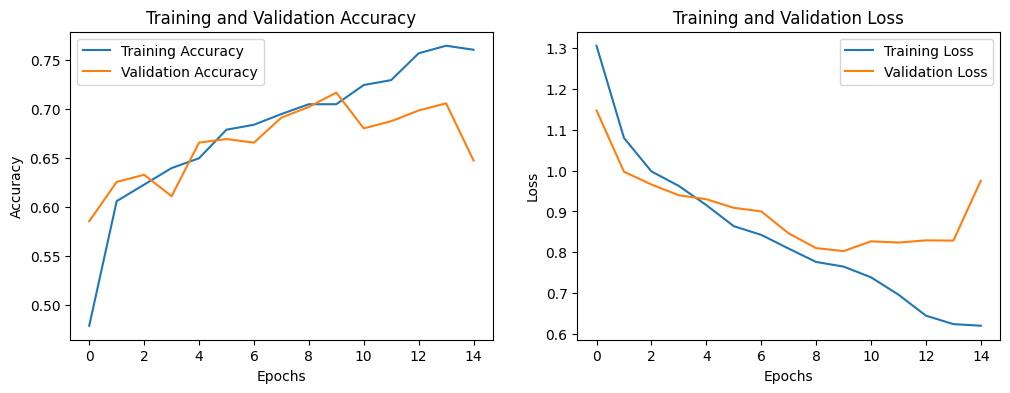

In [7]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(train_acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='best')
ax1.set_title('Training and Validation Accuracy')

ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')
ax2.set_title('Training and Validation Loss')

plt.show()